<a href="https://colab.research.google.com/github/bayu1707/DAA/blob/main/sisdas_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [35]:
# Membuat dataset secara acak
np.random.seed(42)  # Untuk hasil yang konsisten
jumlah_mahasiswa = 100

In [36]:
# Membuat data untuk variabel jumlah jam belajar per minggu
jumlah_jam_belajar = np.random.randint(1, 30, jumlah_mahasiswa)

In [37]:
# Membuat data untuk variabel jumlah ujian yang diikuti
jumlah_ujian = np.random.randint(1, 10, jumlah_mahasiswa)

In [38]:
# Membuat data untuk nilai ujian sebelumnya
nilai_ujian_sebelumnya = np.random.randint(50, 100, jumlah_mahasiswa)

In [39]:
# Membuat variabel nilai akhir berdasarkan bobot variabel sebelumnya dan adakan sedikit variasi
nilai_akhir = (0.4 * jumlah_jam_belajar) + (0.3 * jumlah_ujian) + (0.3 * nilai_ujian_sebelumnya) + np.random.randint(-5, 5, jumlah_mahasiswa)

In [40]:
# Membuat DataFrame dari data yang telah dibuat
data = pd.DataFrame({
    'jumlah_jam_belajar': jumlah_jam_belajar,
    'jumlah_ujian': jumlah_ujian,
    'nilai_ujian_sebelumnya': nilai_ujian_sebelumnya,
    'nilai_akhir': nilai_akhir
})

In [41]:
# Menampilkan lima baris pertama dari dataset
print(data.head())

   jumlah_jam_belajar  jumlah_ujian  nilai_ujian_sebelumnya  nilai_akhir
0                   7             8                      51         23.5
1                  20             7                      51         23.4
2                  29             9                      77         32.4
3                  15             8                      72         28.0
4                  11             5                      86         26.7


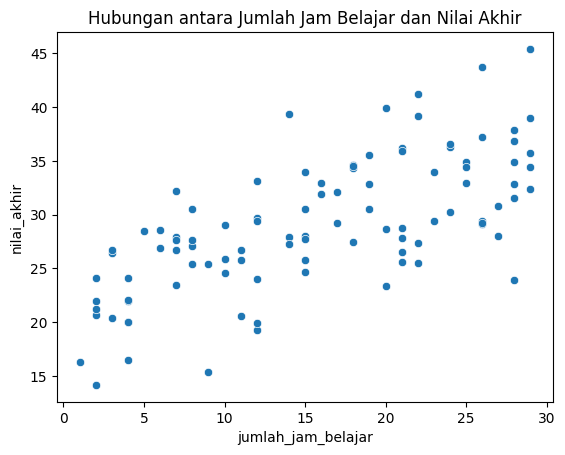

In [42]:
# 1. Hubungan antara jumlah jam belajar per minggu dengan nilai akhir mahasiswa
sns.scatterplot(x='jumlah_jam_belajar', y='nilai_akhir', data=data)
plt.title('Hubungan antara Jumlah Jam Belajar dan Nilai Akhir')
plt.show()

In [43]:
# 2. Pengaruh jumlah ujian yang diikuti terhadap nilai akhir mahasiswa
correlation_ujian_nilai_akhir = data['jumlah_ujian'].corr(data['nilai_akhir'])
print(f"Korelasi antara Jumlah Ujian dan Nilai Akhir: {correlation_ujian_nilai_akhir}")

Korelasi antara Jumlah Ujian dan Nilai Akhir: -0.06647056996353531


In [44]:
# 3. Pengaruh nilai ujian sebelumnya terhadap nilai akhir mahasiswa
correlation_nilai_sebelumnya_nilai_akhir = data['nilai_ujian_sebelumnya'].corr(data['nilai_akhir'])
print(f"Korelasi antara Nilai Ujian Sebelumnya dan Nilai Akhir: {correlation_nilai_sebelumnya_nilai_akhir}")

Korelasi antara Nilai Ujian Sebelumnya dan Nilai Akhir: 0.6286173904366774


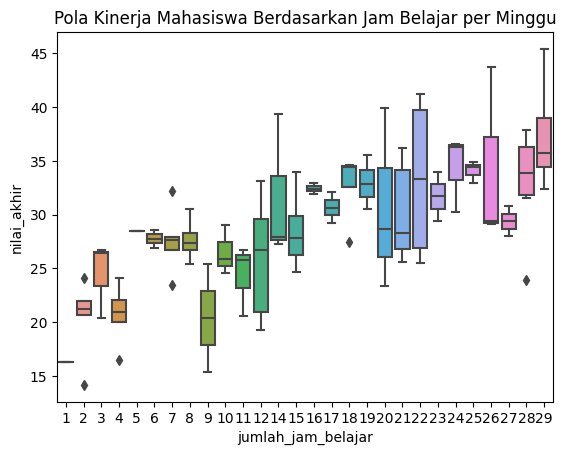

In [45]:
# 4. Pola kinerja mahasiswa berdasarkan jumlah jam belajar per minggu
sns.boxplot(x='jumlah_jam_belajar', y='nilai_akhir', data=data)
plt.title('Pola Kinerja Mahasiswa Berdasarkan Jam Belajar per Minggu')
plt.show()

In [46]:
# 5. Membuat model regresi linear untuk memprediksi nilai akhir
X = data[['jumlah_jam_belajar', 'jumlah_ujian', 'nilai_ujian_sebelumnya']]
y = data['nilai_akhir']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Menampilkan koefisien regresi
print('Koefisien Regresi:')
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

Koefisien Regresi:
jumlah_jam_belajar: 0.4571689681085156
jumlah_ujian: 0.02466725668896369
nilai_ujian_sebelumnya: 0.2630198706504505


In [48]:
# Evaluasi model menggunakan MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 11.434938362047948


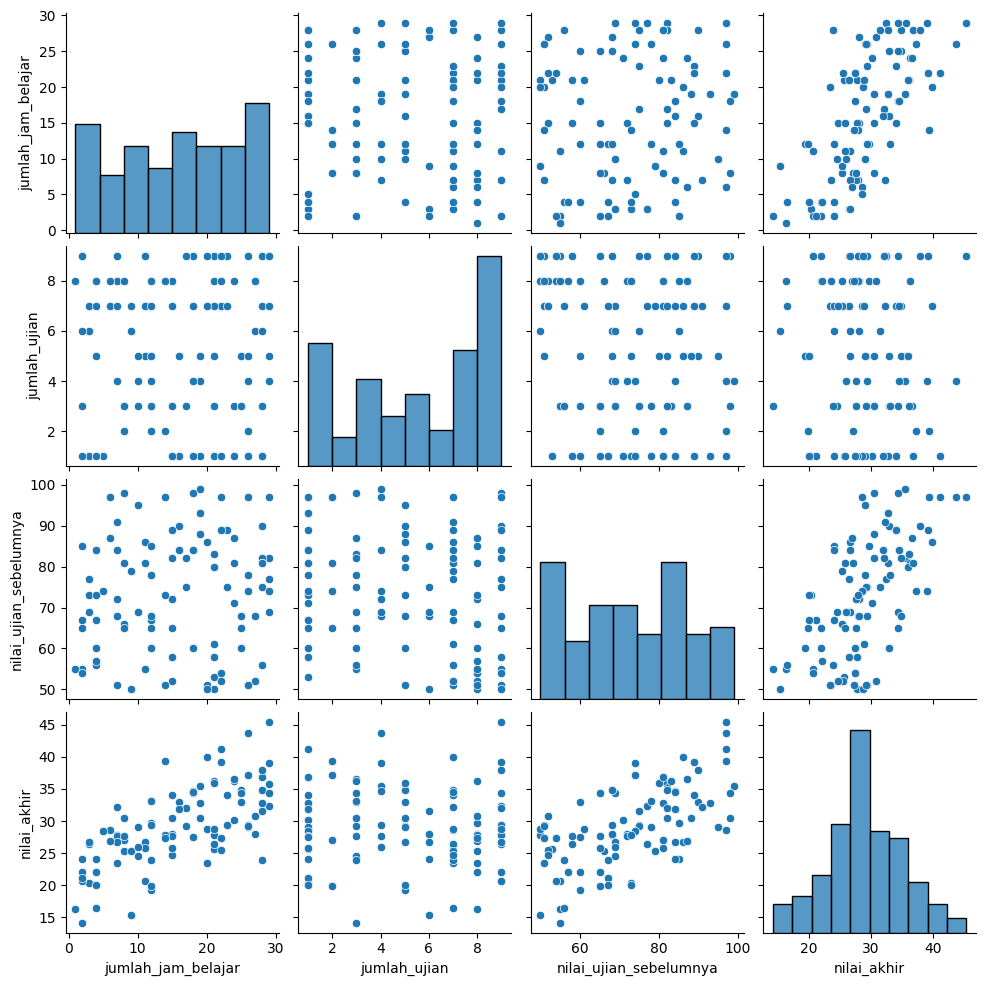

In [49]:
# 6. Interaksi antara variabel-variabel yang mempengaruhi nilai akhir mahasiswa
sns.pairplot(data[['jumlah_jam_belajar', 'jumlah_ujian', 'nilai_ujian_sebelumnya', 'nilai_akhir']])
plt.show()